<h2>FIN5615 Project #6
    <p class="text-primary">S&P 100 Return Analytics</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will examine the historical return performance of the 100 component stocks that make up the S&P 100 index. We will also explore their correlations and identify pairs of stocks that are most highly correlated and relatively uncorrelated.
    </div>
</div>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Data</b>
    </div>
    <div class = "panel-body"> 
    The data for this project includes the historical daily prices, from the stock's inception to June 30th 2020, for each of the 100 component stocks in the S&P 100 index. In the folder "SP100", you will find one CSV file for each of the component stocks.
    <br><br>For this project, we will be focusing only on the historical closing prices listed under column "Adj Close" (adjusted for stock splits). The ticker symbols and company names of each of the stocks are included in a separate file "_SP100.csv", which you can also find the folder "SP100".
    <br><br>Download and place the entire "SP100" folder in the "Data" folder of your working directory. Remember to read in the datasets starting with the relative file path: <code>'../../Data/SP100'</code>.
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Assignmnet_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Add any additional libraries that you plan on using to the import statements in the code block below.
</div>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Read in each of the CSV files for the S&P 100 stocks in a dictionary for us to easily reference and manipulate the data.
    <br>
    <ul>
        <li>Start by reading in the companies and their stock ticker symbols into a dataframe called <code>sp100</code>, with the "Ticker" column as the index.</li>
        <li>Next, create a dictionary called <code>stock_frames</code>. This will serve as a container to store all the historical price data for the component stocks.</li>
        <li>Read in the historical price data for all stocks in <code>sp100</code> as dataframes and store them in <code>stock_frames</code> with the stock's ticker as the key. </li>
        <li>For this project, we will only need the columns "Date" and "Adj Close" so limit to just these two columns when reading in the CSV file, with the "Date" column as the dataframe's index. </li>
    </ul>
    </div>
</div>

<div class = "alert alert-block alert-info">
    <b>Hint</b>: When reading in the CSV files, you may want to use a loop to iterate the index of *sp100* that was created earlier.
</div>

### Q.No.1.1 Start by reading in the companies and their stock ticker symbols into a dataframe called sp100, with the "Ticker" column as the index.
### Answer:

In [130]:
# Reading in the SP100 companies data
sp100 = pd.read_csv(f'../Data/SP100/_SP100.csv', index_col='Ticker')
print(sp100.head())  # Display the first few rows to check the data



                    Company
Ticker                     
AAPL             Apple Inc.
ABBV            AbbVie Inc.
ABT     Abbott Laboratories
ACN               Accenture
ADBE             Adobe Inc.


### Q.No.1.2 Next, create a dictionary called stock_frames. This will serve as a container to store all the historical price data for the component stocks.
### Answer

In [133]:
# Creating an empty dictionary to store historical data for each stock
stock_frames = {}


### Q.No.1.3 Read in the historical price data for all stocks in sp100 as dataframes and store them in stock_frames with the stock's ticker as the key.
### Answer:

In [136]:
# Looping through the tickers to load CSV files
for ticker in sp100.index:
    # Construct the correct file path 
    file_path = f'../Data/SP100/{ticker}.csv'  
    
    # Reading historical data for each ticker
    stock_frames[ticker] = pd.read_csv(
        file_path,
        index_col='Date'  
    )


### Q.No.1.4 For this project, we will only need the columns "Date" and "Adj Close" so limit to just these two columns when reading in the CSV file, with the "Date" column as the dataframe's index.
### Answer:

In [139]:
# Looping through the tickers to load CSV files
for ticker in sp100.index:
    # Construct the correct file path (adjust if necessary)
    file_path = f'../Data/SP100/{ticker}.csv'  # Adjust this path if your file names differ
    
    # Reading historical data for each ticker, selecting only "Date" and "Adj Close"
    stock_frames[ticker] = pd.read_csv(
        file_path,
        index_col='Date',  
        usecols=['Date', 'Adj Close']  # Load only the necessary columns: 'Date' and 'Adj Close'
    )
stock_frames

{'AAPL':            Adj Close
 Date                
 19801212    0.405683
 19801215    0.384517
 19801216    0.356296
 19801217    0.365115
 19801218    0.375698
 ...              ...
 20200624  360.059998
 20200625  364.839996
 20200626  353.630005
 20200629  361.779999
 20200630  364.799988
 
 [9971 rows x 1 columns],
 'ABBV':           Adj Close
 Date               
 20130102  25.678120
 20130103  25.466085
 20130104  25.144379
 20130107  25.195559
 20130108  24.647196
 ...             ...
 20200624  95.139999
 20200625  96.989998
 20200626  96.129997
 20200629  96.440002
 20200630  98.180000
 
 [1887 rows x 1 columns],
 'ABT':           Adj Close
 Date               
 19800317   0.009814
 19800318   0.009883
 19800319   0.010020
 19800320   0.009780
 19800321   0.009883
 ...             ...
 20200624  87.300003
 20200625  89.620003
 20200626  88.709999
 20200629  89.010002
 20200630  91.430000
 
 [10160 rows x 1 columns],
 'ACN':            Adj Close
 Date                
 20010719

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    An issue with our data is that component stocks of the S&P 100 do not all have the same number of historical observations.
    <br><br>To help remedy this, limit the historical price observations to the period ranging from 7/6/2015 to 6/30/2020, which spans 1257 trading days for each stock. Reorganize the data by creating an 2-d array or dataframe called <code>stock_prices</code> to store each stock's historical prices, where axis-0 of the array (rows) is each day of the historical period and axis-1 of the array (columns) are the S&P 100 stocks. 
    <br><br>There are many ways to achieve this, but the easiest way would be to use the <code>pd.concat</code> function to concatenate all the dataframes in <code>stock_frames.values()</code> with the paramters <code>axis = 1</code> and <code>join = 'inner'</code>.
    <br><br>Confirm that at the end of your code, the shape of <code>stock_prices</code> should be <code>(1257, 99)</code>. And the first few rows should look like this:

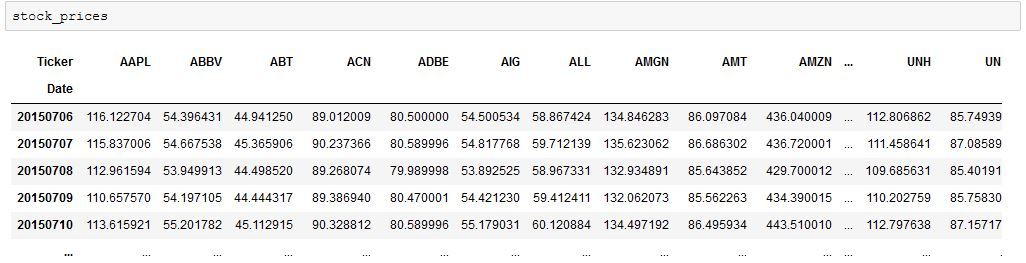
    </div>
</div>

### Q.No.2 Reorganize the data by creating an 2-d array or dataframe called stock_prices to store each stock's historical prices, where axis-0 of the array (rows) is each day of the historical period and axis-1 of the array (columns) are the S&P 100 stocks.
### Answer:

In [84]:

# Defining the start and end date 
start_date = '20150706'
end_date = '20200630'

# Filtering each stock's DataFrame to match the date range
for ticker in stock_frames:
    stock_frames[ticker] = stock_frames[ticker].loc[start_date:end_date]

# Concatenate all dataframes along axis=1 (columns), with an inner join to ensure alignment
stock_prices = pd.concat(stock_frames.values(), axis=1, join='inner')

# Add ticker names to columns
stock_prices.columns =  stock_frames.keys()

# Verify the shape and display the first few rows
print("Shape of stock_prices:", stock_prices.shape)  # Should be (1257, 99)
stock_prices






Shape of stock_prices: (1257, 99)


,AAPL,ABBV,ABT,ACN,ADBE,AIG,ALL,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
20150706,116.122704,54.396431,44.941250,89.012009,80.500000,54.500534,58.867424,134.846283,86.097084,436.040009,...,112.806862,85.749390,82.283913,37.943161,65.693474,37.562855,75.650414,47.528847,63.890312,66.836525
20150707,115.837006,54.667538,45.365906,90.237366,80.589996,54.817768,59.712139,135.623062,86.686302,436.720001,...,111.458641,87.085892,82.998978,37.830032,65.355919,37.730549,77.298264,47.368855,65.000229,67.111877
20150708,112.961594,53.949913,44.498520,89.268074,79.989998,53.892525,58.967331,132.934891,85.643852,429.700012,...,109.685631,85.401917,81.287910,37.133812,64.352989,37.633602,76.111099,46.526745,64.357178,66.383011
20150709,110.657570,54.197105,44.444317,89.386940,80.470001,54.421230,59.412411,132.062073,85.562263,434.390015,...,110.202759,85.758308,81.509254,37.386200,64.661598,37.375053,79.335915,46.737270,64.110527,66.083359
20150710,113.615921,55.201782,45.112915,90.328812,80.589996,55.179031,60.120884,134.497192,86.495934,443.510010,...,112.797638,87.157173,82.539276,37.803921,65.982765,37.972931,82.489861,47.225693,64.410027,66.585472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200624,360.059998,95.139999,87.300003,201.839996,431.679993,30.299999,92.949997,232.509995,254.179993,2734.399902,...,289.179993,165.550003,109.500000,36.440567,191.410004,53.930000,41.169998,26.120001,120.300003,44.500000
20200625,364.839996,96.989998,89.620003,217.320007,436.950012,31.260000,95.830002,235.110001,254.360001,2754.580078,...,296.220001,167.020004,110.519997,37.606823,193.979996,54.279999,42.040001,27.370001,119.709999,45.169998
20200626,353.630005,96.129997,88.709999,212.470001,426.920013,29.709999,94.580002,232.839996,246.479996,2692.870117,...,286.880005,162.639999,107.320000,35.640003,189.270004,53.160000,41.169998,25.340000,118.320000,43.619999


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
        Using the either the array or dataframe <code>stock_prices</code>, calculate the compounding daily returns (expressed as a percentage) and store them in another array called <code>stock_returns</code>. Recall that:
    <br><br>
    $$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) * 100$$
    <br>Confirm that after the calculation, the shape of <code>stock_returns</code> should be <code>(1256, 99)</code>, and the first few rows should look like this:

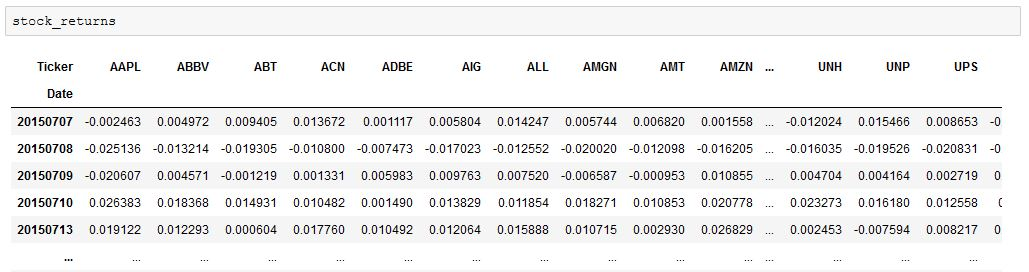
    </div>
</div>

### Q.No.3 Using the either the array or dataframe stock_prices, calculate the compounding daily returns (expressed as a percentage) and store them in another array called stock_returns.
### Answer:

In [88]:
# Calculating daily compounding returns
stock_returns = np.log(stock_prices / stock_prices.shift(1)) * 100

# Drop the first row as it will contain NaN values due to the shift
stock_returns = stock_returns.dropna()

# Verify the shape and display the first few rows
print("Shape of stock_returns:", stock_returns.shape)  # Should be (1256, 99)
print (stock_returns)

Shape of stock_returns: (1256, 99)
              AAPL      ABBV       ABT       ACN      ADBE       AIG  \
Date                                                                   
20150707 -0.246334  0.497153  0.940477  1.367231  0.111734  0.580388   
20150708 -2.513620 -1.321400 -1.930492 -1.079969 -0.747292 -1.702259   
20150709 -2.060741  0.457141 -0.121883  0.133068  0.598285  0.976255   
20150710  2.638317  1.836774  1.493147  1.048189  0.149007  1.382867   
20150713  1.912165  1.229331  0.060375  1.776006  1.049205  1.206367   
...            ...       ...       ...       ...       ...       ...   
20200624 -1.780969 -2.255226 -4.480032 -2.717398 -2.033936 -5.614947   
20200625  1.318821  1.925838  2.622805  7.389567  1.213424  3.119165   
20200626 -3.120771 -0.890645 -1.020593 -2.257015 -2.322213 -5.085567   
20200629  2.278511  0.321966  0.337613  0.117595 -0.639160  3.212732   
20200630  0.831294  1.788145  2.682491  0.935811  2.585335  1.616589   

               ALL      AMGN

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Using <code>stock_returns</code>, calculate the average observed daily returns across the S&P 100 stocks for each day in our historical period. Store this result in a <b>numpy array</b> called <code>daily_returns</code>. Check that the shape of <code>daily_returns</code> is a 1-d array with length 1256.
    <br><br>Plot <code>daily_returns</code> in a line plot. Remember to provide a title, axis labels, and adjust the figure size as neccessary. Your final plot should look like this:

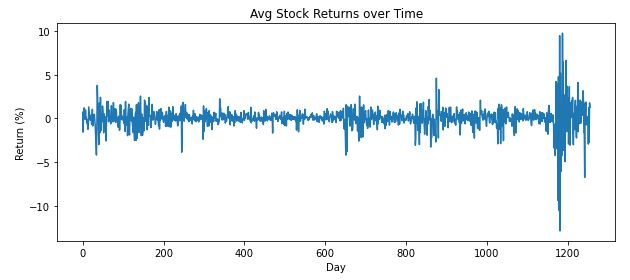
    <br><br>Comment on any noteworthy observations from the plot, and any possible connections to real-world events.
    </div>
</div>

### Q.No.4.1 Using stock_returns, calculate the average observed daily returns across the S&P 100 stocks for each day in our historical period. Store this result in a numpy array called daily_returns. Check that the shape of daily_returns is a 1-d array with length 1256.
### Answer:

In [92]:
# Calculating the average daily returns across all tickers
daily_returns = stock_returns.mean(axis=1).to_numpy()

# Verifying the shape and display the first few values
print("Shape of daily_returns:", daily_returns.shape)  
print(daily_returns[:5])  # Displaying the first 5 values

Shape of daily_returns: (1256,)
[ 0.70871964 -1.56010117  0.24085009  1.21642555  1.13732074]


### Q.No.4.2 Plot daily_returns in a line plot. Remember to provide a title, axis labels, and adjust the figure size as neccessary. 
### Answer:

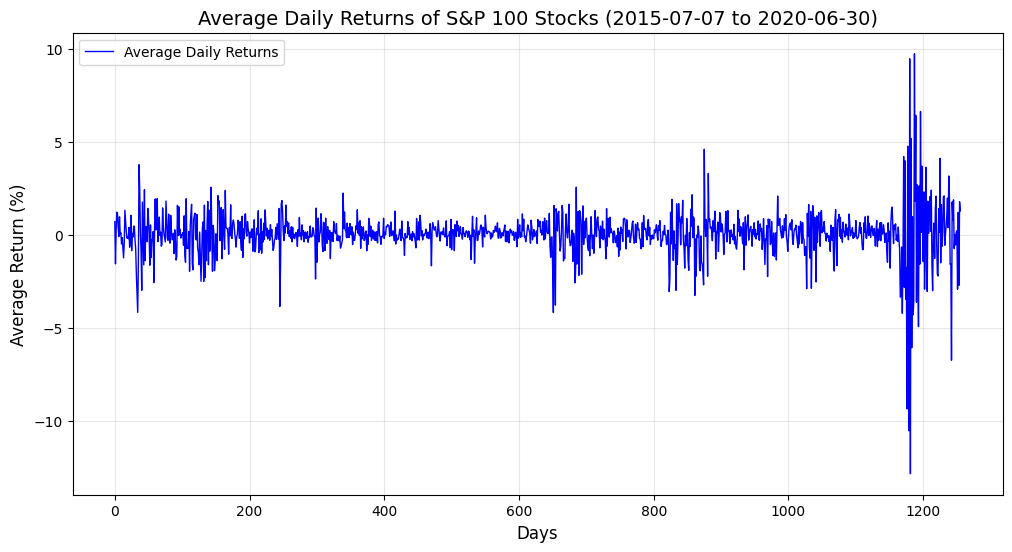

In [95]:
plt.figure(figsize=(12, 6)) 
plt.plot(daily_returns, label='Average Daily Returns', color='blue', linewidth=1)
plt.title('Average Daily Returns of S&P 100 Stocks (2015-07-07 to 2020-06-30)', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Average Return (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.show()



**Comment:**
The noteable observation that I derived from this their is spike in 2016 might be because of events like Brexit, the 2018 sell-off, and COVID-19 in 2020, reflecting market uncertainty. Stable periods, like 2017, show low volatility and steady growth.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Using <code>stock_returns</code>, calculate the average daily returns over the historical period for the S&P 100 stocks. Store this result in another array called <code>avg_returns</code>. Check that the shape of <code>avg_returns</code> is a 1-d array with length 99.
    <br><br>Plot the average returns in <code>avg_returns</code> on a bar plot, sorted by highest to lowest returns. Provide an appropriate title, axis labels, and adjust the figure size for the plot as needed. Your final plot should look like this:

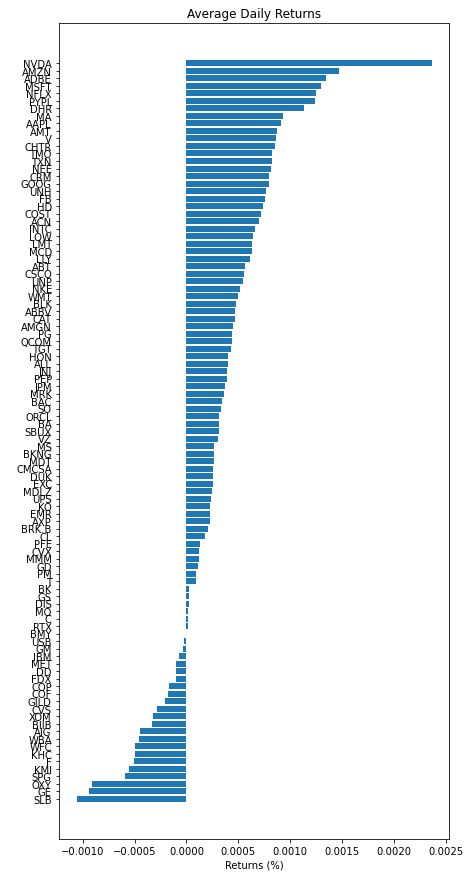
    <br><br>Which stock experienced the highest average daily returns over the historical period? Which stock had the lowest? Provide some comments on whether those observations make sense and why.
    </div>
</div>
<div class = "alert alert-block alert-info">
    <b>Hint</b>: The matplotlib function <b>plt.barh<b> gives a bar plot oriented horizontally.
</div>

### Q.No.5.1 Using stock_returns, calculate the average daily returns over the historical period for the S&P 100 stocks. Store this result in another array called avg_returns. Check that the shape of avg_returns is a 1-d array with length 99.
### Answer:

In [100]:
# Calculating the average daily returns for each ticker across the historical period
avg_returns = stock_returns.mean(axis=0).values

# Verify the shape of avg_returns
print("Shape of avg_returns:", avg_returns.shape)


Shape of avg_returns: (99,)


### Q.No.5.2 Plot the average returns in avg_returns on a bar plot, sorted by highest to lowest returns. Provide an appropriate title, axis labels, and adjust the figure size for the plot as needed. 
### Answer:

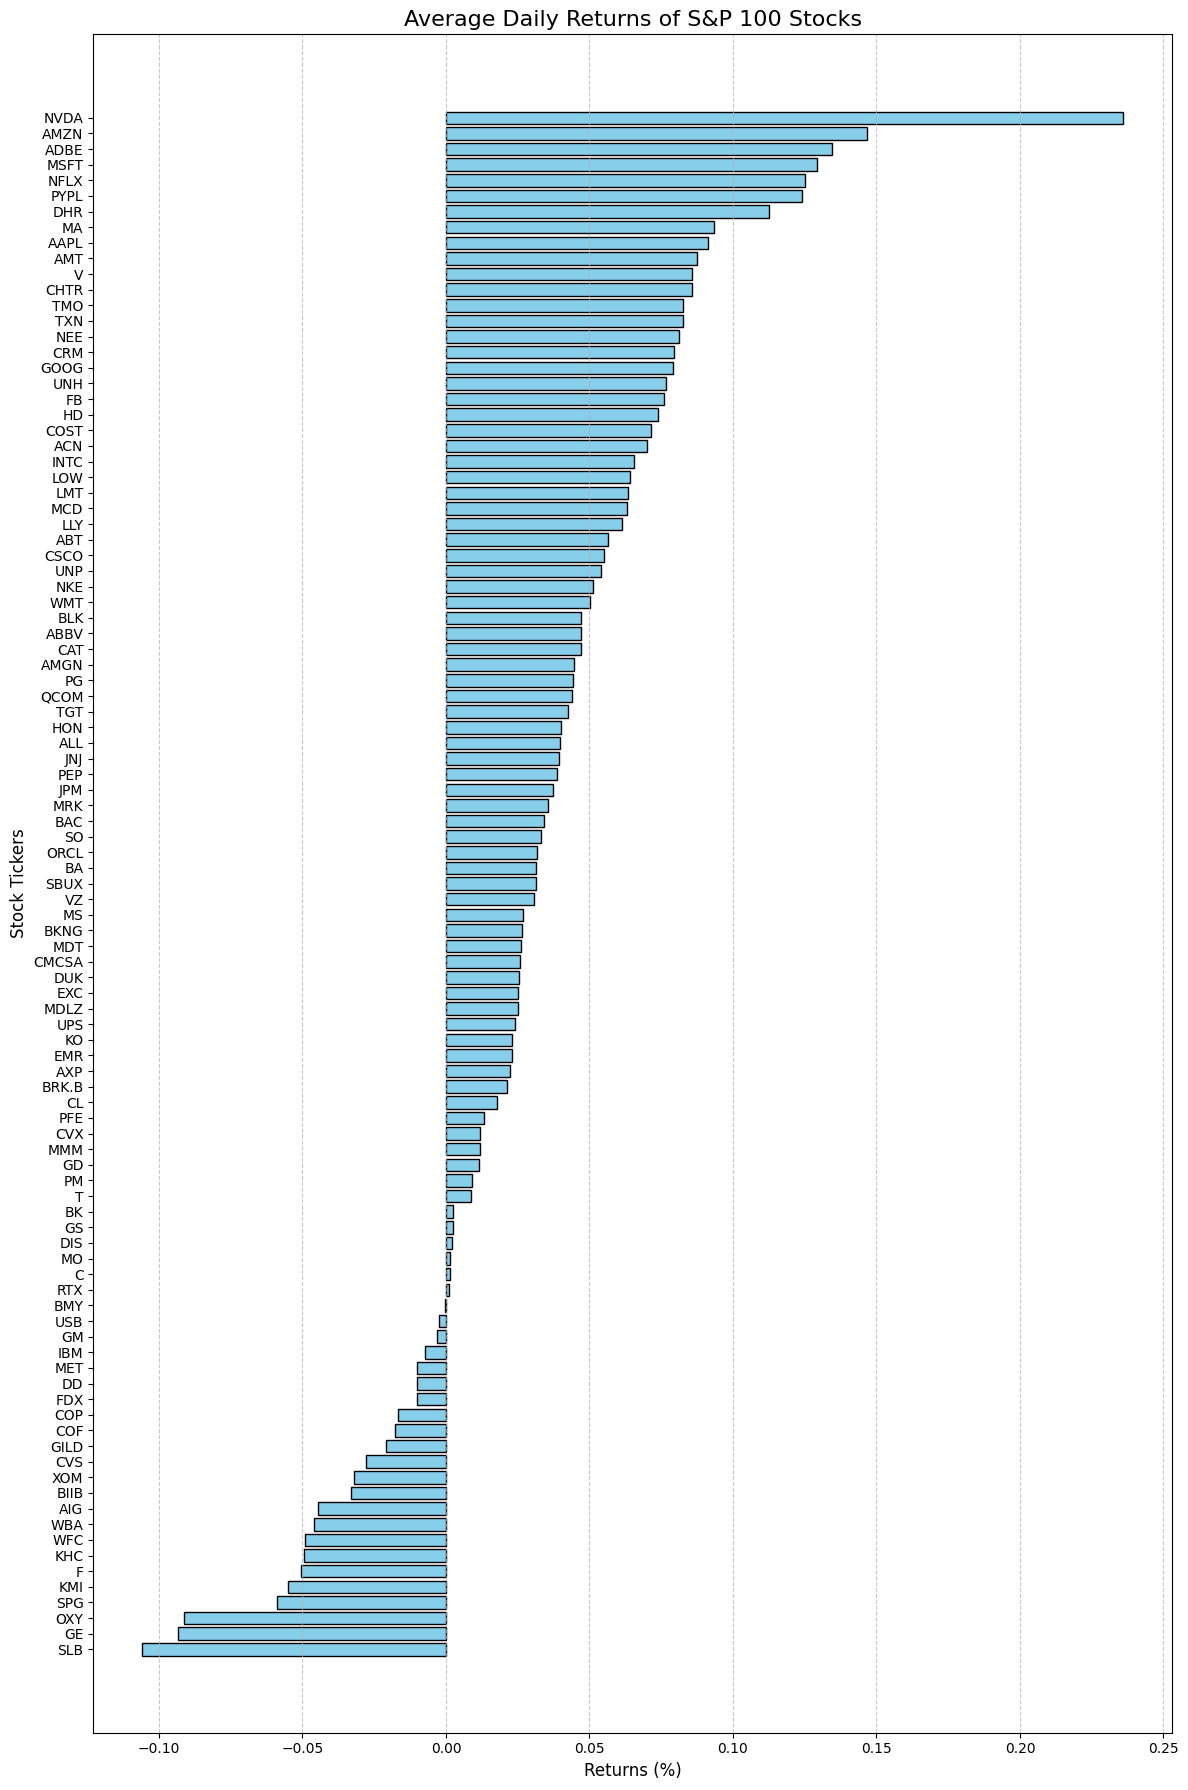

In [103]:

# Converting avg_returns into a pandas Series for better manipulation and labeling
series = pd.Series(avg_returns)

# Assigning stock tickers (assumed to be the column names of stock_returns) as the index for the Series
series.index = stock_returns.columns

# Sorting the returns in ascending order for better visualization
sorted_series = series.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(12, 18))  
plt.barh(sorted_series.index, sorted_series, color='skyblue', edgecolor='black')

plt.title('Average Daily Returns of S&P 100 Stocks', fontsize=16)
plt.xlabel('Returns (%)', fontsize=12)
plt.ylabel('Stock Tickers', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()



### Q.No.5.3 Which stock experienced the highest average daily returns over the historical period? Which stock had the lowest? Provide some comments on whether those observations make sense and why.
### Answer:
Highest Average Daily Return: NVIDIA (NVDA)
Lowest Average Daily Return: Schlumberger (SLB)
This makes sense as NVIDIA benefits from the AI boom (Specially during COVID, while Schlumberger is tied to the slower oil industry.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    Using stock_returns, calculate the standard deviation of daily returns over the historical period for the S&P 100 stocks. Store this result in another array called <code>std_returns</code>. Check that the shape of <code>std_returns</code> is a 1-d array with length 99.
    <br><br>Which stock experienced the highest volatility over the historical period? Which stock had the lowest? Provide some comments on whether those observations make sense and why.
    </div>
</div>

### Q.No.6.1 Using stock_returns, calculate the standard deviation of daily returns over the historical period for the S&P 100 stocks. Store this result in another array called std_returns. Check that the shape of std_returns is a 1-d array with length 99.
### Answer:

In [108]:
# Calculate the standard deviation of daily returns for each stock
std_returns = stock_returns.std(axis=0).values

# Verify the shape of std_returns
if std_returns.ndim == 1 and len(std_returns) == 99:
    print("std_returns is a 1D array with length 99.")
else:
    print("The shape of std_returns is not correct. Current shape:", std_returns.shape)


std_returns is a 1D array with length 99.


### Q.No. 6.2 Which stock experienced the highest volatility over the historical period? Which stock had the lowest? Provide some comments on whether those observations make sense and why.
### Answer:

In [111]:
# Calculating the standard deviation of daily returns for each stock
std_returns = stock_returns.std(axis=0)

# Identifying the indices of the stocks with the highest and lowest volatility
high_vi = np.argmax(std_returns)  # Index of the stock with the highest volatility
low_vi = np.argmin(std_returns)  # Index of the stock with the lowest volatility

# Geting the stock tickers corresponding to the highest and lowest volatility
high_vol_stock = stock_returns.columns[high_vi]
low_vol_stock = stock_returns.columns[low_vi]

print("Stock with the highest volatility:", high_vol_stock)
print("Stock with the lowest volatility:", low_vol_stock)

std_returns.shape


Stock with the highest volatility: OXY
Stock with the lowest volatility: VZ


(99,)

### Comment: This observation makes sense:

**OXY's High Volatility**: As an energy company, OXY's stock is influenced by fluctuating oil prices, geopolitical events, and market demand, which tend to cause significant price swings.
**VZ's Low Volatility**: Verizon operates in the telecommunications sector, which is typically more stable due to consistent demand for communication services and recurring revenue models. Such industries are considered defensive, leading to lower price fluctuations.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    Plot a scatter plot of the standard deviation of returns on the horizontal axis (X) and the average returns on the vertical axis (Y). Provide the plot with a title and axis labels. Your final plot should look like this:

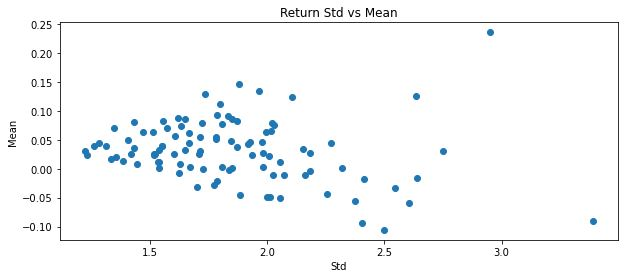
    <br><br>What can we conclude from the plot? Are there any noteworthy patterns or observations?
    </div>
</div>

### Q.No.6.3 Plot a scatter plot of the standard deviation of returns on the horizontal axis (X) and the average returns on the vertical axis (Y). Provide the plot with a title and axis labels.
### Answer:

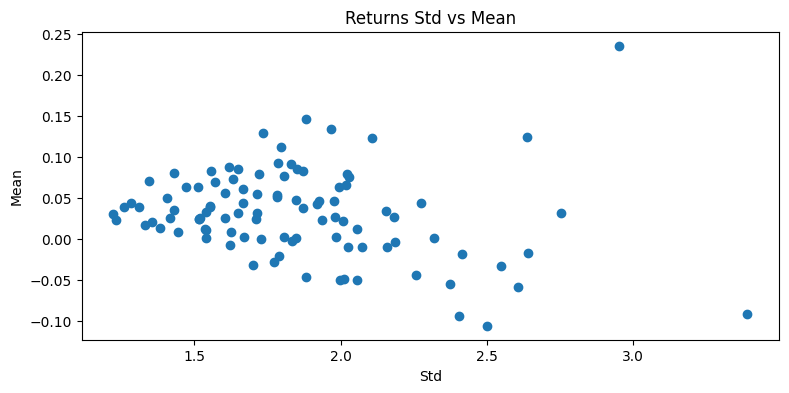

In [116]:
plt.figure(figsize=(9, 4))
plt.scatter(std_returns, avg_returns)
plt.title("Returns Std vs Mean")
plt.xlabel("Std")
plt.ylabel("Mean")
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 8</b>
    </div>
    <div class = "panel-body"> 
    Calculate the correlation matrix for daily returns of the S&P 100 component stocks in <code>stock_returns</code>. Verify that the shape of the calculated matrix is <code>(99, 99)</code>. Store the correlation matrix in a dataframe called <code>corr_returns</code>, and set the stock tickers as both the index and columns of the dataframe. The first few rows will look like this:

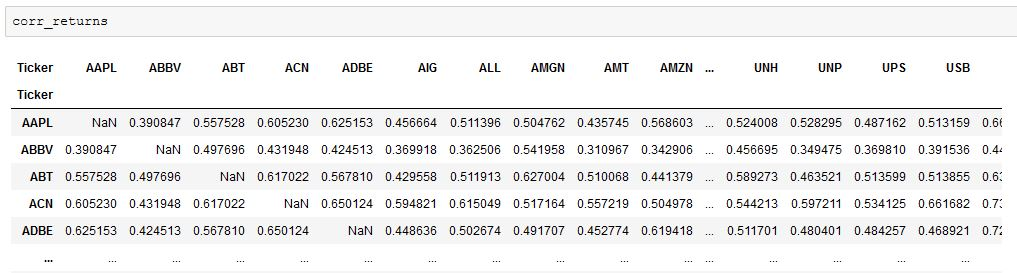
    </div>
</div>

### Q.No.6.4 Calculate the correlation matrix for daily returns of the S&P 100 component stocks in stock_returns. Verify that the shape of the calculated matrix is (99, 99). Store the correlation matrix in a dataframe called corr_returns, and set the stock tickers as both the index and columns of the dataframe. 
### Answer:

In [120]:
# Calculate the correlation matrix
corr_matrix = stock_returns.corr()

# Verify the shape of the correlation matrix
if corr_matrix.shape == (99, 99):
    print("The correlation matrix has the correct shape: (99, 99).")
else:
    print("The shape of the correlation matrix is not correct. Current shape:", corr_matrix.shape)

# Store the correlation matrix in a DataFrame with stock tickers as both the index and columns
corr_returns = pd.DataFrame(corr_matrix, index=stock_returns.columns, columns=stock_returns.columns)

# Display the first few rows of the correlation matrix
print(corr_returns.head())


The correlation matrix has the correct shape: (99, 99).
          AAPL      ABBV       ABT       ACN      ADBE       AIG       ALL  \
AAPL  1.000000  0.390847  0.557528  0.605230  0.625153  0.456664  0.511396   
ABBV  0.390847  1.000000  0.497696  0.431948  0.424513  0.369918  0.362506   
ABT   0.557528  0.497696  1.000000  0.617022  0.567810  0.429558  0.511913   
ACN   0.605230  0.431948  0.617022  1.000000  0.650124  0.594821  0.615049   
ADBE  0.625153  0.424513  0.567810  0.650124  1.000000  0.448636  0.502674   

          AMGN       AMT      AMZN  ...       UNH       UNP       UPS  \
AAPL  0.504762  0.435745  0.568603  ...  0.524008  0.528295  0.487162   
ABBV  0.541958  0.310967  0.342906  ...  0.456695  0.349475  0.369810   
ABT   0.627004  0.510068  0.441379  ...  0.589273  0.463521  0.513599   
ACN   0.517164  0.557219  0.504978  ...  0.544213  0.597211  0.534125   
ADBE  0.491707  0.452774  0.619418  ...  0.511701  0.480401  0.484257   

           USB         V        VZ  

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 9</b>
    </div>
    <div class = "panel-body"> 
    A heatmap is a graphical representation of data that uses a system of color-coding to represent the relative magnitude of a set of data. We can create heatmaps using another external library called <b>seaborn</b>, and using the code snippet below
    <br>
    <code>
    plt.imshow(corr_returns, cmap = 'coolwarm')
    plt.colorbar()
    plt.show()
    </code>
    <br>Plot the heatmap for <code>corr_returns</code>. Rremember to provide a title to the plot and adjust the figure size as neccessary. Your final plot should look like this:

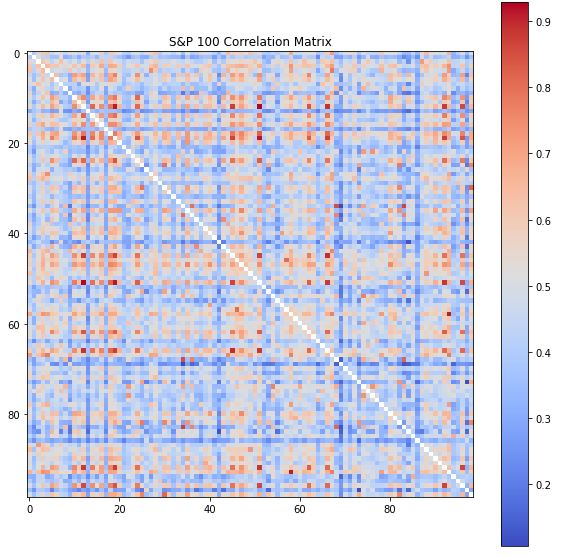
    </div>
</div>

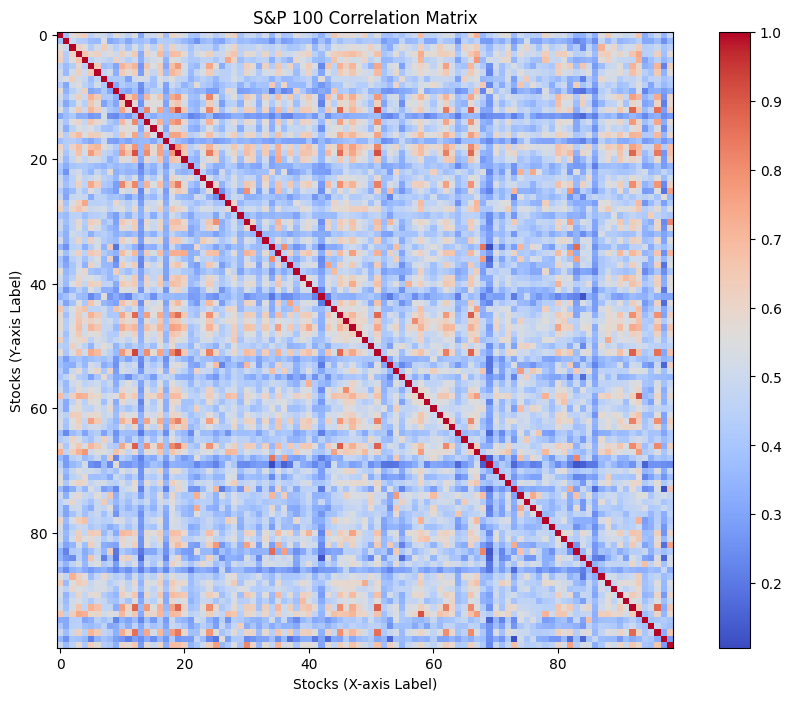

In [123]:
plt.figure(figsize=(12, 8)) 
plt.imshow(corr_returns, cmap='coolwarm')
plt.colorbar()
plt.title("S&P 100 Correlation Matrix")
plt.xlabel("Stocks (X-axis Label)")
plt.ylabel("Stocks (Y-axis Label)")
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 10</b>
    </div>
    <div class = "panel-body"> 
    From the correlation matrix <code>corr_returns</code>, identify the pair of stocks that are <i>most</i> positively correlated (BAC and JPM) and the pair that are <i>least</i> correlated (DUK and NFLX). 
    <br><br>Comment on whether it is reasonable for the identified pairs of stocks to be positively correlated or uncorrelated, and propose a reason as to why for each of the two pairs of stocks.
    </div>
</div>

### 1. Reason for Positive Correlation (BAC and JPM)
It is reasonable for Bank of America (BAC) and JPMorgan Chase (JPM) to be highly positively correlated because both companies operate in the same industry (banking/financial services). Their stock prices are influenced by similar factors like interest rate changes, economic conditions, and industry trends, leading to similar market movements.

### 2. Reason for Low Correlation (DUK and NFLX)
It is reasonable for Duke Energy (DUK) and Netflix (NFLX) to have a very low correlation because they belong to completely different industries (utilities vs. entertainment/technology). Utilities are stable and defensive, while tech/entertainment stocks like Netflix are growth-oriented and highly volatile, responding to vastly different market forces. This divergence leads to minimal or no correlation.